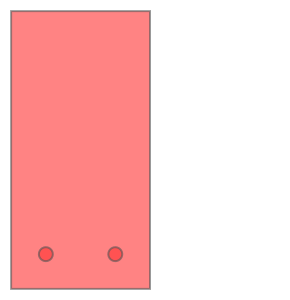

In [219]:
"""Quickstart example."""

import numpy as np
from shapely import Polygon

from structuralcodes import set_design_code
from structuralcodes.geometry import (
    RectangularGeometry,
    SurfaceGeometry,
    add_reinforcement,
    add_reinforcement_line,
)
from structuralcodes.materials.concrete import create_concrete
from structuralcodes.materials.reinforcement import create_reinforcement
from structuralcodes.sections import GenericSection

# Set the active design code
set_design_code('ec2_2004')

# Create a concrete and a reinforcement
fck = 45
fyk = 500
ftk = 550
Es = 200000
epsuk = 0.07

# These factory functions create concrete and reinforcement materials according
# to the globally set design code
concrete = create_concrete(fck=fck)
reinforcement = create_reinforcement(fyk=fyk, Es=Es, ftk=ftk, epsuk=epsuk)

# Create a rectangular geometry
width = 250
height = 500
polygon = Polygon(
    [
        (-width / 2, -height / 2),
        (width / 2, -height / 2),
        (width / 2, height / 2),
        (-width / 2, height / 2),
    ]
)  # We leverage shapely to create geometries
geometry = SurfaceGeometry(
    poly=polygon, material=concrete
)  # A SurfaceGeometry is a shapely Polygon with an assigned material

# Add reinforcement
diameter_reinf = 25
cover = 50

geometry = add_reinforcement(
    geometry,
    (
        -width / 2 + cover + diameter_reinf / 2,
        -height / 2 + cover + diameter_reinf / 2,
    ),
    diameter_reinf,
    reinforcement,
)  # The add_reinforcement function returns a CompoundGeometry
geometry = add_reinforcement(
    geometry,
    (
        width / 2 - cover - diameter_reinf / 2,
        -height / 2 + cover + diameter_reinf / 2,
    ),
    diameter_reinf,
    reinforcement,
)

# Create section
section1 = GenericSection(geometry)

# Calculate the moment-curvature response
moment_curvature = section1.section_calculator.calculate_moment_curvature()

geometry

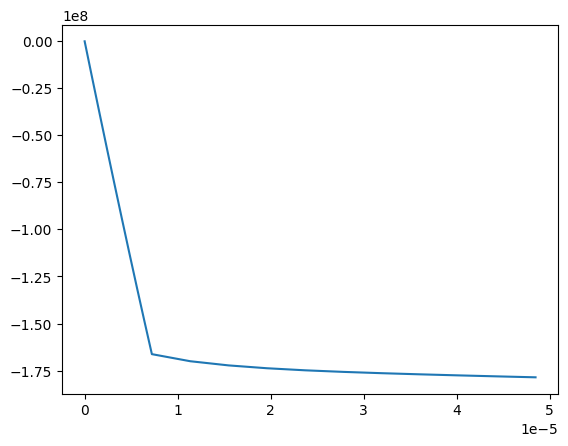

In [220]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(-moment_curvature.chi_y, moment_curvature.m_y)

In [221]:
# New example

concrete = create_concrete(fck=45)
reinforcement = create_reinforcement(fyk=500, Es=200000, ftk=550, epsuk=0.07)

width = 250
height = 500
cover = 50

geometry = RectangularGeometry(width=width, height=height, material=concrete)

# Bottom reinforcement

diameter_reinf_1 = 25
n1 = 3
s1 = width / (n1 + 1)

geometry = add_reinforcement_line(
    geometry,
    [-width / 2 + cover + diameter_reinf_1 / 2,
    -height / 2 + cover + diameter_reinf_1 / 2,],
    [width / 2 - cover - diameter_reinf_1 / 2,
    -height / 2 + cover + diameter_reinf_1 / 2],
    diameter_reinf_1,
    reinforcement,
    n = n1,
)


# Top reinforcement

diameter_reinf_2 = 16
n2 = 5
s2 = width / (n2 + 1)

geometry = add_reinforcement_line(
    geometry,
    [-width / 2 + cover + diameter_reinf_2 / 2,
    height / 2 - cover - diameter_reinf_2 / 2,],
    [width / 2 - cover - diameter_reinf_2 / 2,
    height / 2 - cover - diameter_reinf_2 / 2],
    diameter_reinf_2,
    reinforcement,
    n = n2,
)

my_section = GenericSection(geometry)

n = 10 * 10**4
my = 250 * 10**3
mz = 0

strain = my_section.section_calculator.calculate_strain_profile(n = n, my = my, mz = mz)

print(f'Strain profile: \neps = {strain[0]} \nkappa_y = {strain[1]} \nkappa_z = {strain[2]}')

print(n, my, mz)

my_material = concrete

Strain profile: 
eps = 0.00020880328118956092 
kappa_y = 2.093956171686226e-07 
kappa_z = 1.45648974098648e-24
100000 250000 0


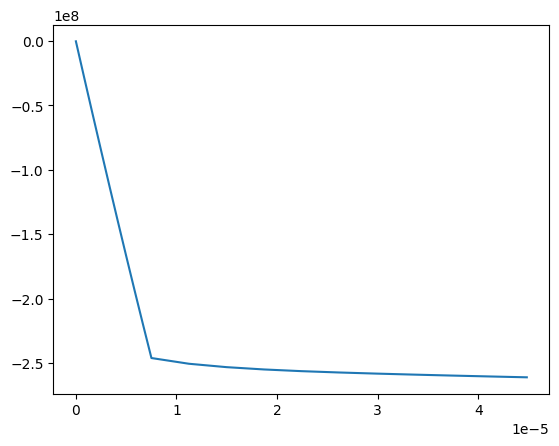

In [222]:
moment_curvature2 = my_section.section_calculator.calculate_moment_curvature()

fig, ax = plt.subplots()
ax.plot(-moment_curvature2.chi_y, moment_curvature2.m_y)

In [223]:
result1 = section.section_calculator.integrate_strain_profile(strain = strain, integrate = 'modulus')
            # `result` will be the tangent stiffness matrix (a 3x3 numpy array)

result2 = section.section_calculator.integrate_strain_profile(strain)
            # `result` will be a tuple containing section forces (N, My, Mz)

print(f'Tangent stiffness matrix: \n{result1}')
print(f'Section forces: \n{result2}')

Tangent stiffness matrix: 
[[ 1.96349541e+08 -3.68155389e+10 -2.56077254e-07]
 [-3.68155389e+10  6.90291355e+12  4.26795424e-05]
 [-2.56077254e-07  4.26795424e-05  7.66990394e+11]]
Section forces: 
(np.float64(33289.415898111554), np.float64(-6241765.480895916), np.float64(-4.3415748197096065e-11))


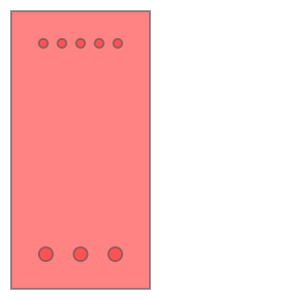

In [224]:
geometry

In [225]:
# Calculate the capacity of the section
N = 0
M = 1000
moment_capacity = section.section_calculator.calculate_bending_strength(N, M)

print(moment_capacity)

UltimateBendingMomentResults(theta=0, n=np.float64(999.9966466318001), m_y=np.float64(-178361246.25272208), m_z=np.float64(2.1842952931532895e-08), chi_y=np.float64(-4.860640201814305e-05), chi_z=np.float64(0.0), eps_a=0.00865160050453576)


In [226]:
from structuralcodes.materials.concrete import ConcreteEC2_2004
from structuralcodes.materials.constitutive_laws import Elastic


class MySpecialConcrete(ConcreteEC2_2004):
    def __init__(self, youngs_modulus, fck):
        super().__init__(fck = 45)
        self.constitutive_law = Elastic(youngs_modulus)

new_concrete = MySpecialConcrete(30000, fck=45)

